In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
import csv
import numpy as np
import math


In [2]:
df2=pd.read_csv('final_input_file.csv')
#df2

# Visualizing dataset

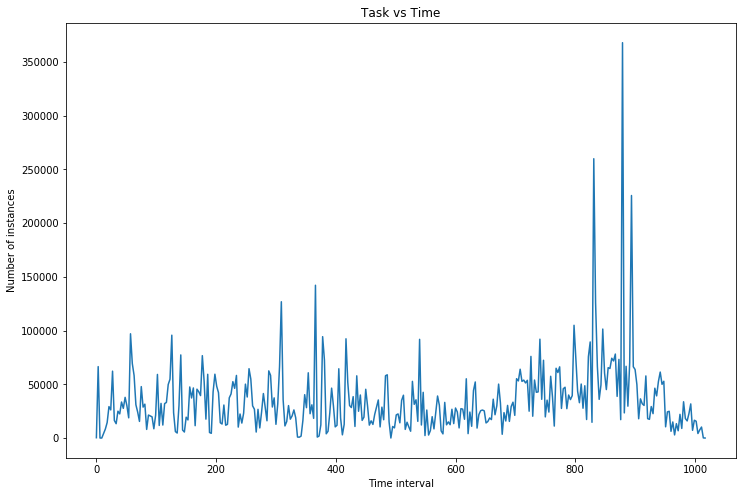

In [5]:
fig=plt.figure(figsize=(12,8))
plt.title("Task vs Time")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(df2.time_interval, df2.no_of_instances)
plt.show()

# Moving Average

C:\Users\Uvcan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


Time=15, predicted=14210.200000, expected=8375.000000
Time=18, predicted=15825.200000, expected=14431.000000
Time=21, predicted=5421.400000, expected=29231.000000
Time=24, predicted=11267.400000, expected=26181.000000
Time=27, predicted=16503.400000, expected=62225.000000
Time=30, predicted=28088.600000, expected=16371.000000
Time=33, predicted=29687.800000, expected=13337.000000
Time=36, predicted=29469.000000, expected=24957.000000
Time=39, predicted=28614.200000, expected=22465.000000
Time=42, predicted=27871.000000, expected=33509.000000
Time=45, predicted=22127.800000, expected=27614.000000
Time=48, predicted=24376.400000, expected=37844.000000
Time=51, predicted=29277.800000, expected=29999.000000
Time=54, predicted=30286.200000, expected=18792.000000
Time=57, predicted=29551.600000, expected=97007.000000
Time=60, predicted=42251.200000, expected=69360.000000
Time=63, predicted=50600.400000, expected=58208.000000
Time=66, predicted=54673.200000, expected=30980.000000
Time=69, pre

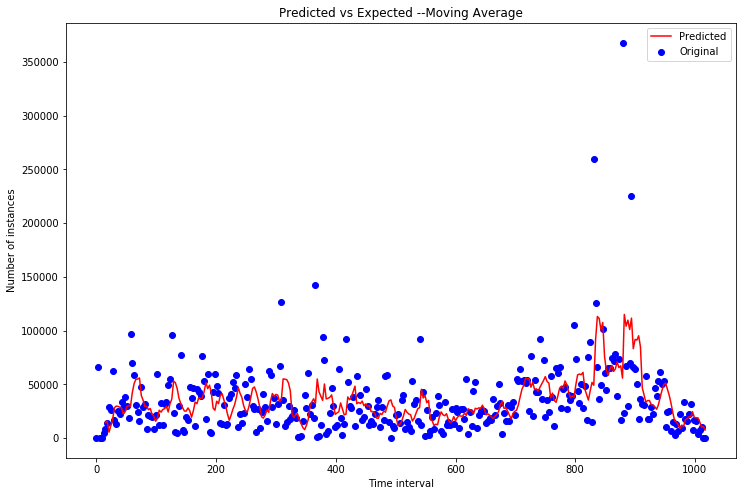

Computational Time= 0.3950438000028953


C:\Users\Uvcan\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [3]:
#https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

#Computational Time
import time
time_start = time.clock()
#series = Series.from_csv('final_input_file.csv', header=0)
# prepare situation
X = df2.no_of_instances
#print('Values', X)
window = 5
testEnd=len(X)-0
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, testEnd)]
Begin=0
End=(len(test))
#print('TEST',test)
predictions = list()
times=list()
SE=0
sumAPE=0
#sumMASE=0
# walk forward over time steps in test
for t in range(Begin,End):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    times.append(df2.time_interval[t+window])
    #print('TIME=',times)
    print('Time=%d, predicted=%f, expected=%f' % (df2.time_interval[t+window], yhat, obs))
    #Evaluation
    e=abs(yhat-obs)
    SE=SE+e*e
    APE=abs((yhat-obs)/obs)
    sumAPE=sumAPE+APE
    #ASE=abs((yhat-obs)/(df2.no_of_instances[t+window]-df2.no_of_instances[t+window-1]))
    #sumMASE=sumMASE+ASE
#error = math.sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % error)
RMSE=math.sqrt(SE/((End-Begin)))
MAPE=(sumAPE/((End-Begin)))*100
#MASE=(sumMASE/(len(X)-window))
print('RMSE Value= ', RMSE)
print('MAPE Value= ', MAPE)
#print('MASE Value= ', MASE)
#print('TIME=',times)

# plot
fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected --Moving Average")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.scatter(df2.time_interval, df2.no_of_instances, color='blue',label='Original')
plt.plot(times, predictions, color='red',linestyle='solid',label='Predicted')
plt.legend()
plt.show()

# zoom plot
#plt.plot(times,test, label='Original')
#plt.plot(times, predictions, color='red',linestyle='dashed',label='Predicted')
#plt.legend()
#plt.show()

#Computational Time
time_elapsed = (time.clock() - time_start)
print('Computational Time=', time_elapsed)